<a href="https://colab.research.google.com/github/pusatalamsemestaa/Machine-Learning/blob/main/JS2_Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B).

In [2]:
!pip install -q pandas matplotlib numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('wbc.csv')
df.head()

Saving wbc.csv to wbc (1).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

In [3]:
import pandas as pd

# Muat dataset Anda
df = pd.read_csv('wbc.csv')

# Buang kolom 'id' karena tidak relevan
df_cleaned = df.drop(columns=['id'])

# Periksa jumlah missing values
missing_values = df_cleaned.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values)

# Hapus kolom dengan missing values > 70% (contoh saja)
threshold = 0.7 * len(df_cleaned)
df_cleaned = df_cleaned.dropna(thresh=threshold, axis=1)

Jumlah nilai hilang per kolom:
 diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed

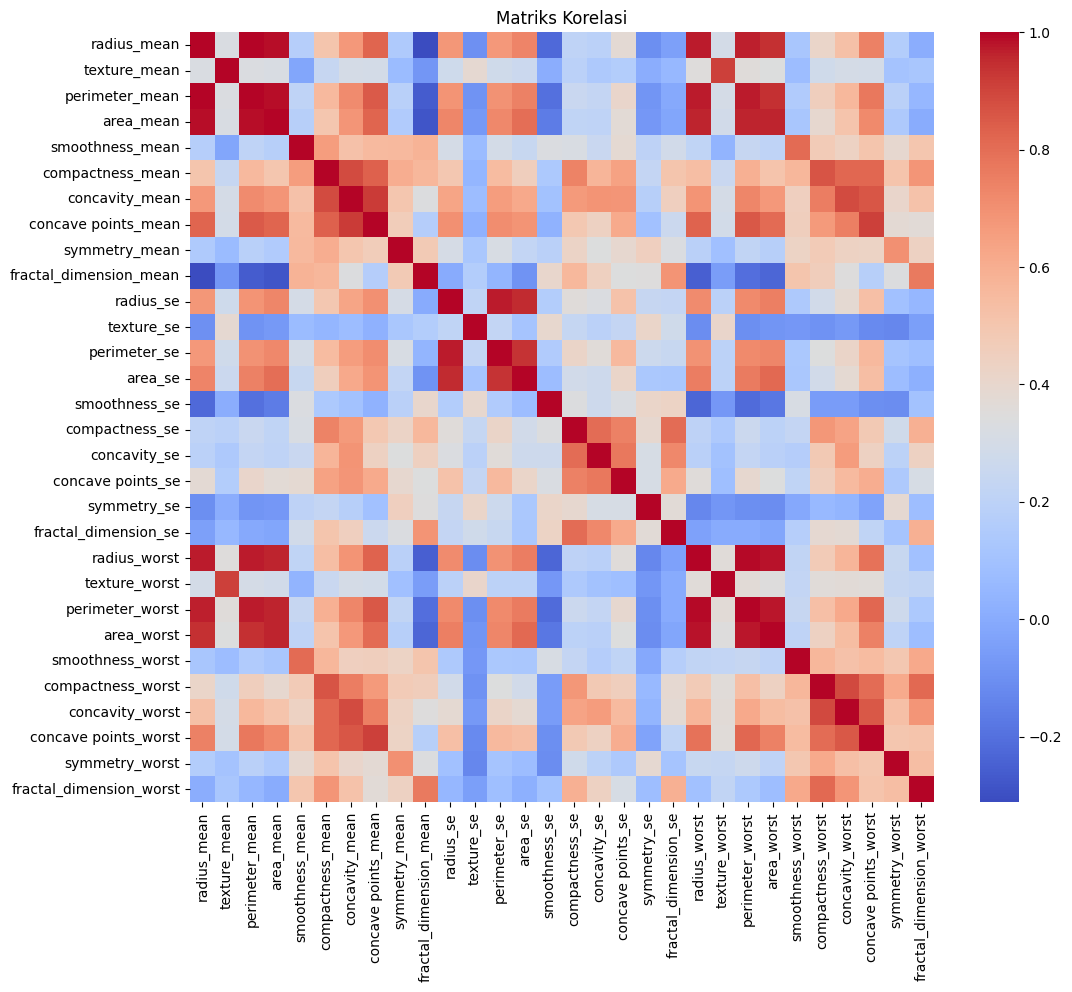

Variabel yang sangat berkorelasi dan akan dibuang: ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


In [12]:
# Hitung matriks korelasi
correlation_matrix = df_cleaned.corr()

# Tampilkan matriks korelasi dalam bentuk heatmap untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

# Temukan variabel yang sangat berkorelasi
high_corr_threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > high_corr_threshold)]

print("Variabel yang sangat berkorelasi dan akan dibuang:", to_drop)
df_final = df_cleaned.drop(columns=to_drop)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Pisahkan variabel fitur (X) dan variabel target (y)
# 'diagnosis' adalah variabel target Anda dalam dataset WBC
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Latih model Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Ambil dan urutkan pentingnya fitur
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("Pentingnya Fitur:\n", feature_importances_sorted)

# Buang variabel dengan pentingnya yang rendah (misalnya, di bawah 0.01)
low_importance_features = feature_importances_sorted[feature_importances_sorted < 0.01].index
print("\nVariabel yang akan dibuang karena pentingnya rendah:", list(low_importance_features))

df_final = X.drop(columns=low_importance_features)

Pentingnya Fitur:
 concave points_worst       0.144224
area_worst                 0.127942
perimeter_worst            0.104916
concave points_mean        0.102179
radius_worst               0.088036
area_mean                  0.062513
concavity_worst            0.044259
radius_mean                0.041025
area_se                    0.037092
concavity_mean             0.036829
perimeter_mean             0.032155
compactness_mean           0.020154
texture_worst              0.019563
texture_mean               0.016059
compactness_worst          0.014738
perimeter_se               0.013131
smoothness_worst           0.013044
radius_se                  0.012836
concavity_se               0.011100
symmetry_worst             0.010147
fractal_dimension_se       0.007194
fractal_dimension_worst    0.006497
smoothness_mean            0.006333
concave points_se          0.004918
symmetry_mean              0.004120
symmetry_se                0.004095
smoothness_se              0.003914
texture_s

2. Lakukan proses encoding pada kolom "diagnosis".

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # membuat objek dari LabelEncoder
df['diagnosis'] = le.fit_transform(df['diagnosis']) # proses encoding

3. Lakukan proses standardisasi pada semua kolom yang memiliki nilai numerik.

In [17]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom dengan tipe data 'int64' dan 'float64'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Langkah 2: Lakukan standarisasi pada kolom-kolom tersebut
std = StandardScaler()
df[numerical_cols] = std.fit_transform(df[numerical_cols])

# Tampilkan DataFrame setelah standarisasi
print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405   1.297676     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403   1.297676     1.829821     -0.353632        1.685955   1.908708   
2  0.431741   1.297676     1.579888      0.456187        1.566503   1.558884   
3  0.432121   1.297676    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201   1.297676     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   ...  texture_worst  perimeter_worst  area_worst  smoo

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,NaN
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,NaN
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,NaN
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,NaN
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,NaN
